**Dados 03**
=========================

## Eu sabia que você era um problema

**Grahcyanne's:** Geovana Bettero e Samira Oliveira

---

Objetivo: Escolha entre a sua dupla um dataset que tem potencial para ser o dataset do trabalho de conclusão da disciplina (é um dataset, não dois, não três). Datasets didáticos (tipo os que tem no seaborn) são desencorajados para esta tarefa. Carregue seu dataset em um DataFrame. Identifique quais são as colunas que contém atributos e quais são as colunas que contém targets. Faça uma análise exploratória dos dados, buscando entender como eles se comportam (não se esqueça de uma breve discussão). Identifique os tipos dos dados e realize conversão simbólico-numérica para todos os dados categóricos que identificou como atributo ou target (preste atenção se seus dados são ordinais ou nominais para fazer a conversão mais apropriada). Identifique dados que requerem transformação (seja por conversão de unidades ou por aplicação de logaritmo) e realize as transformações necessárias. Encerre seu trabalho definindo dois DataFrames: um chamado X que deverá conter todos seus atributos e um chamado y contendo todos seus targets. Tanto atributos quanto targets nestes DataFrames finais devem ser numéricos e já transformados (se for o caso). Não normalize os dados ainda!

Importando as bibliotecas que serão usadas ao longo do notebook:

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
nome_do_arquivo = "Dataset - Classificação de Saúde Fetal.xlsx"
df_do_excel = pd.read_excel(nome_do_arquivo)
df_do_excel

,Frequência cardíaca basal (FCF),Número de acelerações por segundo,Número de movimentos fetais por segundo,Número de contrações uterinas por segundo,Número de LDs por segundo,Número de SDs por segundo,Número de DPs por segundo,Porcentagem de tempo com variabilidade anormal de curto prazo,Valor médio da variabilidade de curto prazo,Porcentagem de tempo com variabilidade anormal de longo prazo,...,Valor mínimo do histograma,Valor máximo do histograma,Número de picos no histograma do exame,Número de zeros no histograma do exame,Moda do histograma,Média do histograma,Mediana do histograma,Variância do histograma,Tendência do histograma,Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


<h3>Targets e atributos:</h3>

A última coluna do DataFrame é o target - do tipo numérico, que classifica a saúde fetal como: 1 - Normal, 2 - Suspeito e 3 - Patológico. Isso, com base nos atributos, que são as demais colunas do DataFrame.<br>

O que cada coluna representa é, em ordem simples: Número de acelerações por segundo, Número de movimentos fetais por segundo, Número de contrações uterinas por segundo, Número de LDs (desacelerações leves) por segundo, Número de SDs (desacelerações severas) por segundo, Número de DPs (desacelerações prolongadas) por segundo, Porcentagem de tempo com variabilidade anormal de curto prazo, Valor médio da variabilidade de curto prazo, Porcentagem de tempo com variabilidade anormal de longo prazo, Valor médio da variabilidade de longo prazo, Largura do histograma feito com todos os valores de um registro, Valor mínimo do histograma, Valor máximo do histograma, Número de picos no histograma do exame, Número de zeros no histograma do exame, Moda do histograma, Média do histograma, Variância do histograma, Tendência do histograma e Saúde fetal (1 - Normal 2 - Suspeito 3 - Patológico).<br>
Os colunas que envolvem prazos: curto e longo, não são definidos - pelo autor do DataFrame, qual é o tempo exato de 'curto' e 'longo'.

<h3>Análise exploratória dos dados:</h3>

O DataFrame escolhido se refere a <b>saúde fetal</b>.
<h4>Porquê estudar saúde fetal?</h4>
A redução da mortalidade infantil reflete-se em vários objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador chave do progresso humano. Paralelamente à noção de mortalidade infantil está, naturalmente, a mortalidade materna, que é responsável por 295 000 mortes durante e após a gravidez e o parto (em 2017). A grande maioria destas mortes (94%) ocorreu em locais com poucos recursos e a maioria poderia ter sido evitada.<br>
Com base no exposto acima, os cardiotocogramas (CTGs) são uma opção simples e de baixo custo para avaliar a saúde fetal, permitindo aos profissionais de saúde tomar medidas para prevenir a mortalidade infantil e materna. O equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, esclarecendo assim a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.<br>
A partir disso, esse conjunto de dados contém 2.126 registros de características extraídas de exames de cardiotocograma, que foram então classificados por três obstetras especialistas em 3 classes: Normal, Suspeito e Patológico. [1]

In [69]:
df_do_excel.describe()

,Frequência cardíaca basal (FCF),Número de acelerações por segundo,Número de movimentos fetais por segundo,Número de contrações uterinas por segundo,Número de LDs por segundo,Número de SDs por segundo,Número de DPs por segundo,Porcentagem de tempo com variabilidade anormal de curto prazo,Valor médio da variabilidade de curto prazo,Porcentagem de tempo com variabilidade anormal de longo prazo,...,Valor mínimo do histograma,Valor máximo do histograma,Número de picos no histograma do exame,Número de zeros no histograma do exame,Moda do histograma,Média do histograma,Mediana do histograma,Variância do histograma,Tendência do histograma,Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


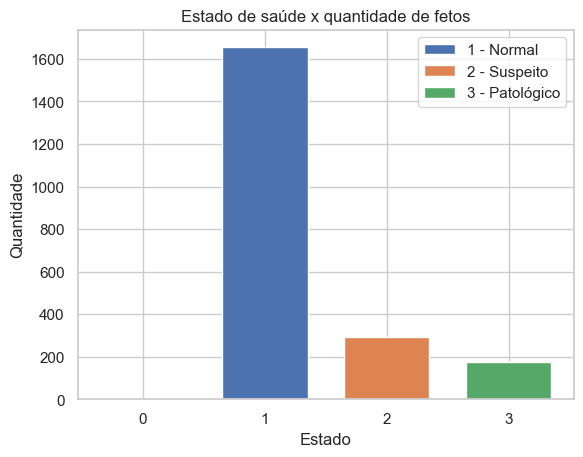

In [104]:
figura, eixo = plt.subplots()

list_1 = []
list_2 = []
list_3 = []
for i in df_do_excel['Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico']:
    if i == 1:
        list_1.append(i)
    elif i == 2:
        list_2.append(i)
    else:
        list_3.append(i)
        
eixo.hist(list_1, bins=range(5), align="left", rwidth=0.7)
eixo.hist(list_2, bins=range(5), align="left", rwidth=0.7)
eixo.hist(list_3, bins=range(5), align="left", rwidth=0.7)
plt.xticks(np.arange(0, 4, 1))
eixo.set_xlabel("Estado")
eixo.set_ylabel("Quantidade")
plt.title("Estado de saúde x quantidade de fetos")
plt.legend(["1 - Normal", "2 - Suspeito" , "3 - Patológico"])    

<h3>Tipos de dados, Conversões e Transformações:</h3>
Todos os dados do DadaFrame são do tipo numérico, mas se diferem em inteiros e pontos flutuantes:<br><br>

<b>Colunas de dados do tipo inteiros:</b> Frequência cardíaca basal (FCF),Porcentagem de tempo com variabilidade anormal de curto prazo, Porcentagem de tempo com variabilidade anormal de longo prazo, Largura do histograma feito com todos os valores de um registro, Valor mínimo do histograma, Valor máximo do histograma, Número de picos no histograma do exame, Número de zeros no histograma do exame, Moda do histograma, Média do histograma, Mediana do histograma, Variância do histograma, Tendência do histograma e Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico.<br>

<b>Colunas de dados do tipo ponto flutuante:</b> Número de acelerações por segundo, Número de movimentos fetais por segundo,Número de contrações uterinas por segundo, Número de LDs por segundo, Número de SDs por segundo, Número de DPs por segundo, Valor médio da variabilidade de curto prazo,Valor médio da variabilidade de longo prazo.<br>

Analisando nosso DataFrame percebemos que conversões e transformações não fazem sentido, visto que todas as colunas já estão todas representadas em dados numéricos e que por se tratar de dados de exames médicos, a representação já está padronizada para a área.

<h3>Separando o joio (atributos - X) do trigo (target - Y):</h3>

In [75]:
atributos = ["Frequência cardíaca basal (FCF)", "Porcentagem de tempo com variabilidade anormal de curto prazo", "Porcentagem de tempo com variabilidade anormal de longo prazo", "Largura do histograma feito com todos os valores de um registro", "Valor mínimo do histograma", "Valor máximo do histograma", "Número de picos no histograma do exame", "Número de zeros no histograma do exame", "Moda do histograma", "Média do histograma", "Mediana do histograma", "Variância do histograma", "Tendência do histograma", "Número de acelerações por segundo", "Número de movimentos fetais por segundo","Número de contrações uterinas por segundo", "Número de LDs por segundo", "Número de SDs por segundo", "Número de DPs por segundo", "Valor médio da variabilidade de curto prazo","Valor médio da variabilidade de longo prazo"]
target = ["Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico"]

df = pd.DataFrame(df_do_excel)

df = df.reindex(atributos + target, axis=1)

x = df.reindex(atributos, axis=1)
y = df.reindex(target, axis=1)

x = x.values
y = y.values.ravel()

print(f"Atributos: {x}")
print()
print(f"Target: {y}")

Atributos: [[120.   73.   43.  ...   0.    0.5   2.4]
 [132.   17.    0.  ...   0.    2.1  10.4]
 [133.   16.    0.  ...   0.    2.1  13.4]
 ...
 [140.   79.   20.  ...   0.    0.4   6.1]
 [140.   78.   27.  ...   0.    0.4   7. ]
 [142.   74.   36.  ...   0.    0.4   5. ]]

Target: [2 1 1 ... 2 2 1]


<h3>Referências:</h3>
Fetal Health Classification. Disponível em: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification.<br><br>
bar(x, height) / barh(y, width) — Matplotlib 3.5.1 documentation. Disponível em: https://matplotlib.org/stable/plot_types/basic/bar.html#sphx-glr-plot-types-basic-bar-py.<br><br>
CASSAR, D. R.Tipos de dados.(2023)<br><br>
CASSAR, D. R. k-vizinhos mais próximos.(2023)